In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
csv_directory = os.getcwd()[:-40] + 'dataset\\'
dataset = 'features.csv'
csv_path = os.path.join(csv_directory, dataset)
mydata = pd.read_csv(csv_path, delimiter=';', usecols=['is_featured', 'version', 'tags_number', 'score', 
                                                       'is_best_time_to_launch', 'is_best_day_to_launch', 
                                                       'is_weekend', 
                                                       'discretized_positive_description_score', 
                                                       'discretized_negative_description_score', 
                                                       'text_description_length', 
                                                       'sentence_length_in_the_description', 'bullet_points_explicit_features', 
                                                       'emoji_in_description', 'tagline_length', 'emoji_in_tagline', 
                                                       'are_there_video', 'are_there_tweetable_images', 'are_there_gif_images', 
                                                       'number_of_gif', 'offers', 'promo_discount_codes', 
                                                       'are_there_questions', 'hunter_has_twitter', 'hunter_has_website', 
                                                       'hunter_followers', 'hunter_apps_made', 'hunter_follows_up_on_comments', 
                                                       'maker_has_twitter', 'maker_has_website', 'maker_followers', 
                                                       'maker_started_comment_thread', 'maker_comment_ratio', 'thread_length',
                                                       'hunter_is_maker', 
                                                       'discretized_maker_positive_comment_score', 
                                                       'discretized_maker_negative_comment_score', 
                                                       'discretized_others_positive_comment_score', 
                                                       'discretized_others_negative_comment_score', 
                                                       'topic'])

mydata = mydata.rename(columns = {'discretized_positive_description_score': 'positive_description_sentiment', 
                         'discretized_negative_description_score': 'negative_description_sentiment', 
                         'discretized_maker_positive_comment_score': 'maker_positive_comment',
                         'discretized_maker_negative_comment_score': 'maker_negative_comment',
                         'discretized_others_positive_comment_score': 'others_positive_comment', 
                         'discretized_others_negative_comment_score': 'others_negative_comment'})

In [3]:
target = mydata['is_featured']  # dependent variable
mydata = mydata.drop(['is_featured'], axis=1)  # independent variables

In [4]:
target = target.replace({'Yes': 1, 'No': 0})

mydata = pd.get_dummies(mydata, columns=['is_best_time_to_launch', 'is_best_day_to_launch', 'is_weekend', 
                                         'positive_description_sentiment', 'negative_description_sentiment',
                                         'bullet_points_explicit_features', 'emoji_in_description', 'emoji_in_tagline', 
                                         'are_there_video', 'are_there_tweetable_images', 'are_there_gif_images', 'offers', 
                                         'promo_discount_codes', 'are_there_questions', 'hunter_has_twitter', 
                                         'hunter_has_website', 'hunter_follows_up_on_comments', 'maker_has_twitter', 
                                         'maker_has_website', 'maker_started_comment_thread', 'hunter_is_maker', 
                                         'maker_positive_comment', 'maker_negative_comment', 'others_positive_comment', 
                                         'others_negative_comment'], 
                        drop_first=True)
mydata = mydata.rename(columns = {'positive_description_sentiment_True': 'positive_description_sentiment', 
                                  'negative_description_sentiment_True': 'negative_description_sentiment', 
                                  'maker_positive_comment_True': 'maker_positive_comment', 
                                  'maker_negative_comment_True': 'maker_negative_comment', 
                                  'others_positive_comment_True': 'others_positive_comment', 
                                  'others_negative_comment_True': 'others_negative_comment'})

mydata = pd.get_dummies(mydata, columns=['text_description_length', 'sentence_length_in_the_description', 'tagline_length', 
                                         'hunter_followers', 'hunter_apps_made', 'maker_followers'])
mydata = mydata.drop(['text_description_length_Short', 'sentence_length_in_the_description_Short', 'tagline_length_Short', 
                     'hunter_followers_High', 'hunter_apps_made_High', 'maker_followers_High'], axis=1)

mydata = pd.get_dummies(mydata, columns = ['topic'])
mydata = mydata.drop(['topic_web development'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(mydata, target, test_size=0.3, train_size=0.7, random_state=30)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# predict probabilities
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

In [8]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [9]:
lr_auc = roc_auc_score(testy, lr_probs)
print("AUC Value = {}".format(round(lr_auc, 3))) 

AUC Value = 0.984


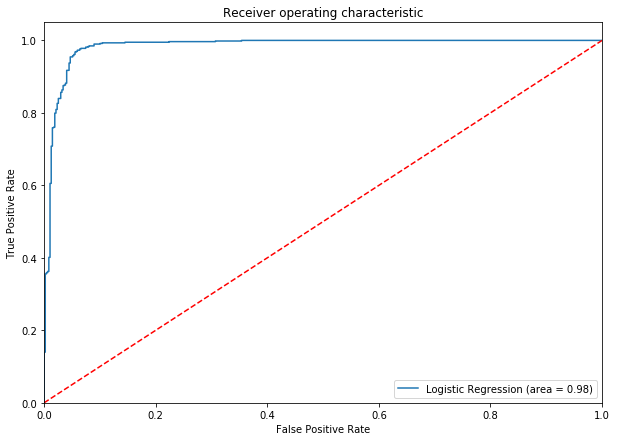

In [10]:
# calculate and show ROC Curve
lr_fpr, lr_tpr, threshold = roc_curve(testy, lr_probs)
plt.figure(figsize=(10,7))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AUC_ROC_Curve.png')
plt.show()